## LEAD SCORING CASE STUDY

-- Lead conversion rate is 30 %
-- Identifiy most potential Leads i.e people who are more chances to enroll "HOT LEADS"
-- This will increase the conversioon rate as call will be made to only those HOT LEADS instead of calling everybody.
-- Assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance
and the customers with lower lead score have a lower conversion chance.
-- Lead conversion target should be around 80 %

In [326]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

Imported Necessary Libraries

 Loading and Reading the data

In [327]:
leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [328]:
leads.shape

(9240, 37)

In [329]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [330]:
# to see the Numeric values in the data

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [331]:
# Checking for duplicate values in the Data Frame/ Data Set.

leads.duplicated().sum()

0

As per understanding columns ProspectID and Lead number denotes the same thing i.e define a unique ID for all the customers that were contacted.
Being an ID column both can be dropped as it will not provide much insight going forward.

### 1. Data cleaning and Preparation

In [332]:
# Replacing the Select values with nan as it is not an valid value.

leads=leads.replace('Select',np.nan)

In [333]:
# Dropping the ID columns i.e ProspectID and Lead Number.

leads.drop(['Prospect ID', 'Lead Number'],axis=1,inplace=True)

In [334]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [335]:
#Checking percentage of NULL values.

def perc_null(x):
    return round(100*(x.isnull().sum()/len(x.index)), 2)
    

(perc_null(leads))

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [336]:
# Dropping columns with more than 40% NULL values

drop_cols=leads.columns

for i in drop_cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, axis=1, inplace = True)

In [337]:
# again checking the percentage of NULLS

perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Here we can see still there are some columns that have high % of missing values, but again we cannot conclude and remove all those also, because we may loose a lot of data and it will affect our resulting model.
If the need arises we will drop these columns in future steps.

In [338]:
leads['Country'].value_counts(dropna=False,normalize=True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

Here clearly India is the most common value present. We create categories by which we can impute the null values too.

In [339]:
leads['Country'] = leads['Country'].fillna('Not Mentioned')

In [340]:
# we Create sepearte category to club all the other low frequency values, this will help in DUMMY creation step further.

def categories(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Mentioned":
        category = "Not Mentioned"
    else:
        category = "Outside India"
    return category

leads['Country'] = leads.apply(lambda x:categories(x['Country']), axis = 1)
leads['Country'].value_counts()

India            6492
Not Mentioned    2461
Outside India     287
Name: Country, dtype: int64

In [341]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

  ***************************************

In [342]:
leads['Specialization'].value_counts(dropna=False,normalize=True)*100 # For this we cannot clearly say which is the most leading value as all the categories have some good number values..

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [343]:
# We impute the missing values/Null values with 'Not Mentioned'

leads['Specialization'] = leads['Specialization'].fillna('Not Mentioned') 

In [344]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

    *******************************************************************************************************************

In [345]:
leads['What is your current occupation'].value_counts(dropna=False,normalize=True)*100 # Here "Unemployed" is clearly the most common value

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [346]:
# imputing the missing values with "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unemployed')

In [347]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

    *******************************************************************************************************************

In [348]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100 

#Clearly there is one value most common among all with 70 %.

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [349]:
# imputing the nulls with "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [350]:
perc_null(leads)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

    *******************************************************************************************************************

In [351]:
# Columns "TAGS"

leads['Tags'].value_counts(dropna=False,normalize=True)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [352]:
#replacing Nan values with "Not Specified"

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [353]:
# Again as we can see there are many values in "Tags" that are present even less that 5%. So we club those values to into a single categry to assist us in DUMMY creation Step.

leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')
leads['Tags'] = leads['Tags'].replace(['switched off','Already a student','Lost to EINS','Not doing further education','Busy','invalid number','Closed by Horizzon','wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [354]:
leads['Tags'].value_counts(dropna=False,normalize=True)*100

Not Specified                          36.287879
Other_Tags                             22.716450
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Name: Tags, dtype: float64

    *******************************************************************************************************************

In [355]:
# CITY column.

leads['City'].value_counts(dropna=False,normalize=True)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [356]:
# Replacing NaN values with "Mumbai"

leads['City'] = leads['City'].replace(np.nan,'Mumbai')

**************

Finally checking again for Null values.

In [357]:
perc_null(leads)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

***********************************************************************************************

In [358]:
 #📌 DROPPING THE REMAINING NULL VALUES as the percentage is less that 2 % so it will not affect our data adversly.
 
leads_final=leads.dropna()

In [359]:
perc_null(leads_final)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [360]:
leads_final.shape

(9074, 28)

    *******************************************************************************************************************

### 2. EDA

#### 2.1 Univariate Analysis

###### 2.1.1 Categorical columns

In [361]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

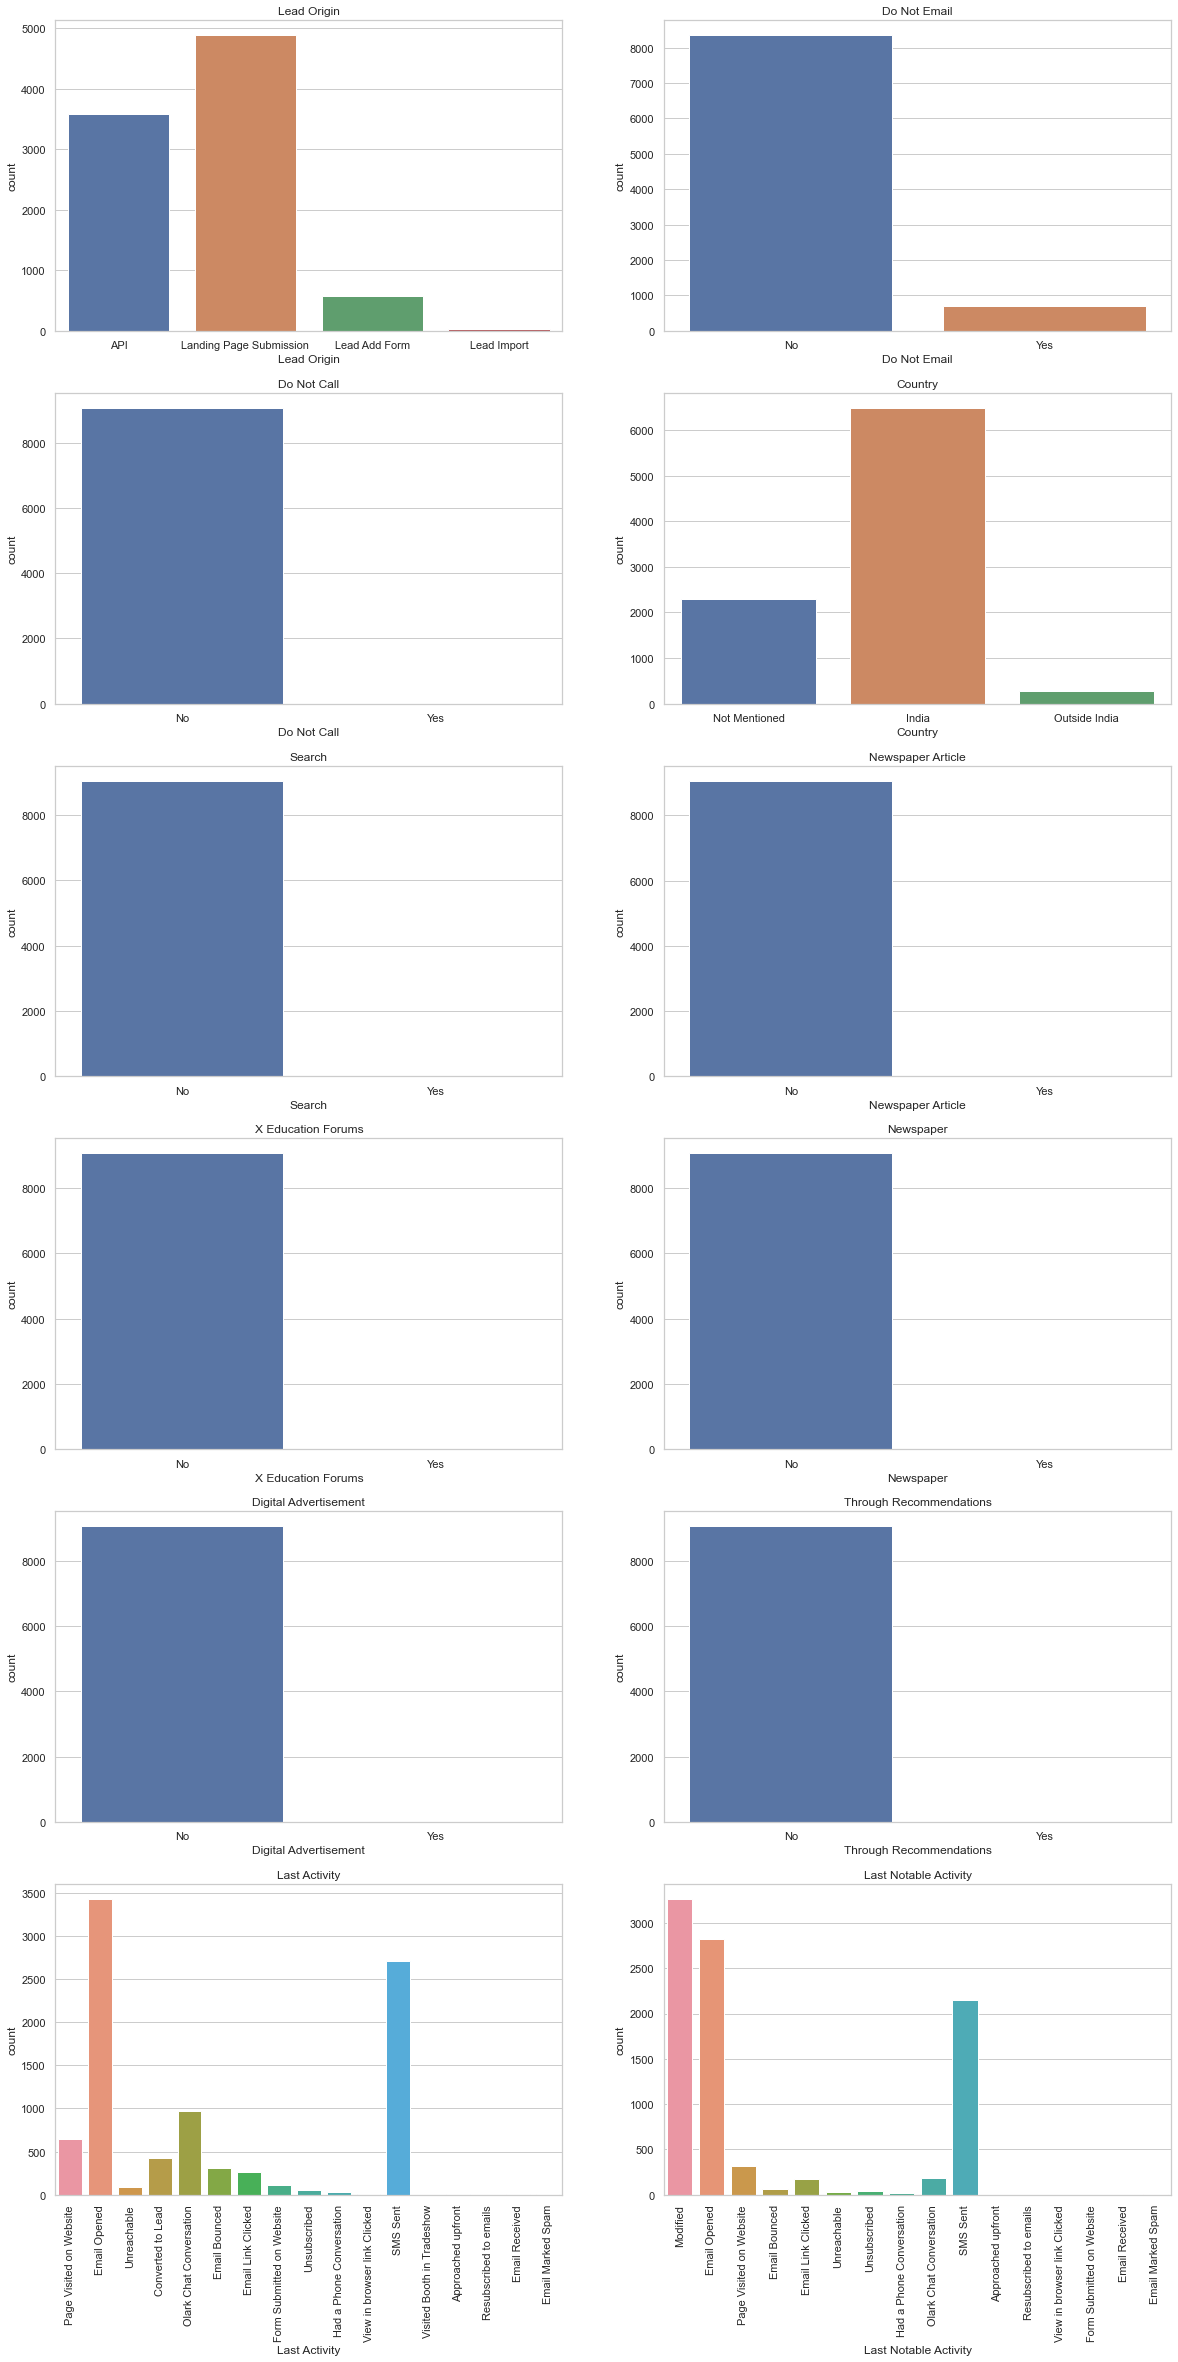

In [362]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leads_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leads_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leads_final['Last Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(6,2,12)
sns.countplot(leads_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

-----------------------------------------------------------------------------------------------

In [363]:
# By looking at the above plots we can see some improper values in some columns, now to help us in furthur steps we combine less occuring values into a single category.

leads_final['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

In [364]:
leads_final['Last Notable Activity']=leads_final['Last Notable Activity'].replace(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked',
                                                                                    'Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam',
                                                                                    'Approached upfront','Resubscribed to emails','View in browser link Clicked',
                                                                                    'Form Submitted on Website','Email Received'],'Other_Activity')

In [365]:
leads_final['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

In [366]:
leads_final['Last Activity']=leads_final['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed',
                                                                    'Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                                                    'Email Received','Email Marked Spam',
                                                                    'Visited Booth in Tradeshow','Resubscribed to emails'],'Other_Activity')

 ***************************************************************************************

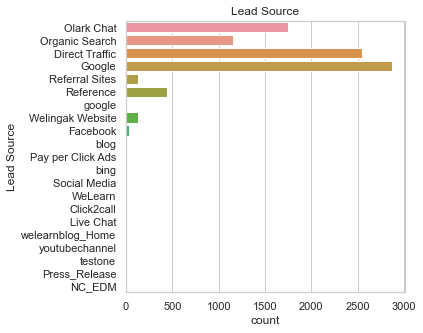

In [367]:
plt.figure(figsize = (5,5))

sns.countplot(data=leads_final,y='Lead Source').tick_params(axis='y')
plt.title('Lead Source')
plt.show()

###### 📌 The graph above shows that major source of getting the leads is GOOGLE. 

Also based on the above plot we can club the lower frequency values into a single category to ease our process.

In [368]:
# Checking the values_counts

leads_final['Lead Source'].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

In [369]:
# combining low frequency values and also replacing left over nan values if any. As this would help in DUMMY Creation in furthur steps.

leads_final['Lead Source'] = leads_final['Lead Source'].replace(np.nan,'Others')
leads_final['Lead Source'] = leads_final['Lead Source'].replace('google','Google')
leads_final['Lead Source'] = leads_final['Lead Source'].replace('Facebook','Social Media')
leads_final['Lead Source'] = leads_final['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')  

*************************************************************************************************

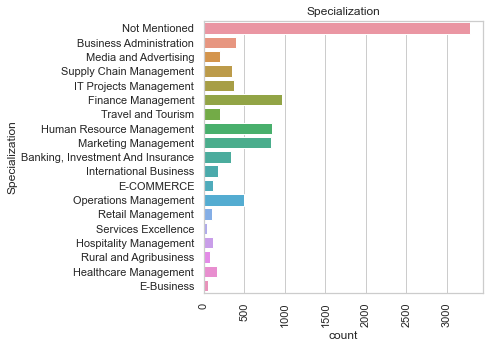

In [370]:
plt.figure(figsize = (5,5))

sns.countplot(data=leads_final,y='Specialization',orient="h").tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

###### 📌 From the above we see that a Majority of the customers choose not to specify thier domain in which they are working. And a large number of customer are from Finance Management. Overall Management segment has majority of customers.

Again we can see as there are multiple segments for MANAGEMENT we can again club them together for a better insight.

In [371]:
leads_final['Specialization'].value_counts(normalize=True)*100

Not Mentioned                        36.169275
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

In [372]:
leads_final['Specialization'] = leads_final['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management',
                                                     'Operations Management','IT Projects Management',
                                                     'Supply Chain Management','Healthcare Management','Hospitality Management',
                                                    'Retail Management'] ,'Management') 

Combinig multiple values will help later in our DUMMY creation STEP.
***********************************************************************************

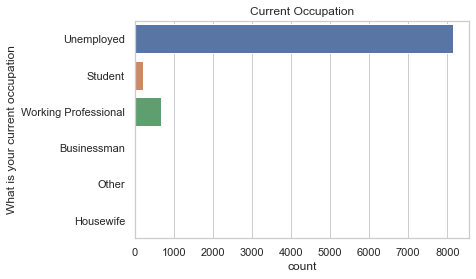

In [373]:
sns.countplot(data=leads_final,y='What is your current occupation').tick_params(axis='x')

plt.title('Current Occupation')

plt.show()

###### 📌 From aboe it is seen that most of the customers are UNEMPLOYED.

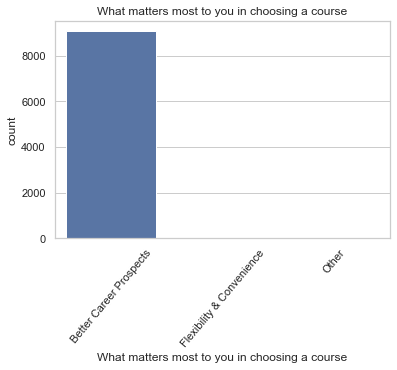

In [374]:
sns.countplot(data=leads_final,x='What matters most to you in choosing a course').tick_params(axis='x', rotation = 50)

plt.title('What matters most to you in choosing a course')

plt.show()

📌 Here from the above plot we see a clear majority of people doing the Course with the motto of BETTER CAREER PROSPECTS. However this is also an unbalanced variable.

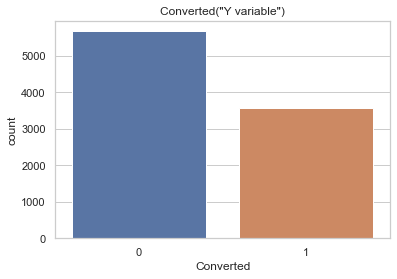

In [375]:
sns.countplot(leads['Converted'])

plt.title('Converted("Y variable")')

plt.show()

📌 From the above we see that untill now most majority of the leads that the company got were not Converted i.e did not buy/enroll into any of the courses.

Comparing some of the catergorical variables with the Target variable i.e Converted.

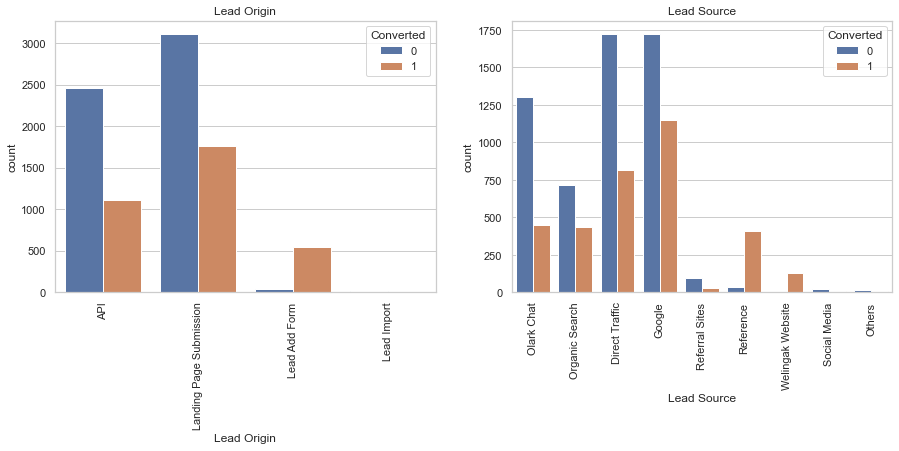

In [376]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

1. Majority of the Leads were Identified at the "Landing Page Submission"
2. "Olark Chat", "Direct Trafic" and "Google" were major Lead sources and amongst them Google saw highe lead conversion.

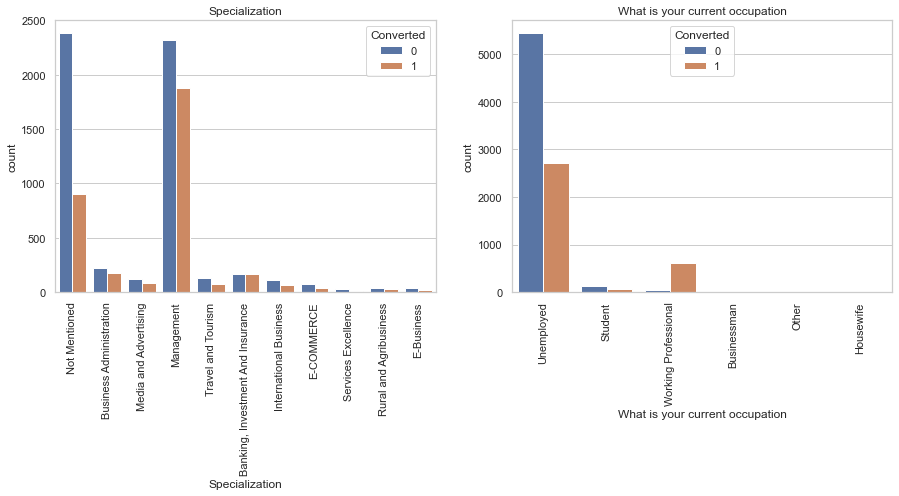

In [377]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

📌 Majority of the Leads have choosen Not to mention their workig Domain and also majority of the customers are Unemployed.

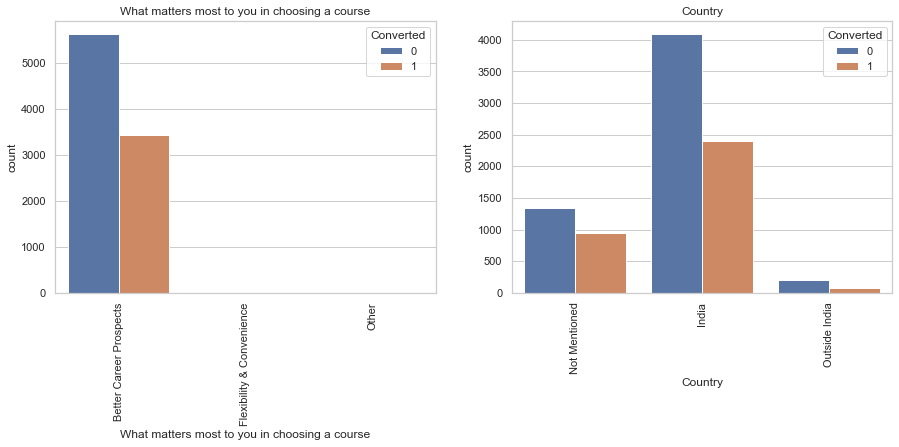

In [378]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

This plot shows a particular reson majorily why people are choosing a course.
Also most of the leads are from INDIA. Also here again we can see an imbalance in data.

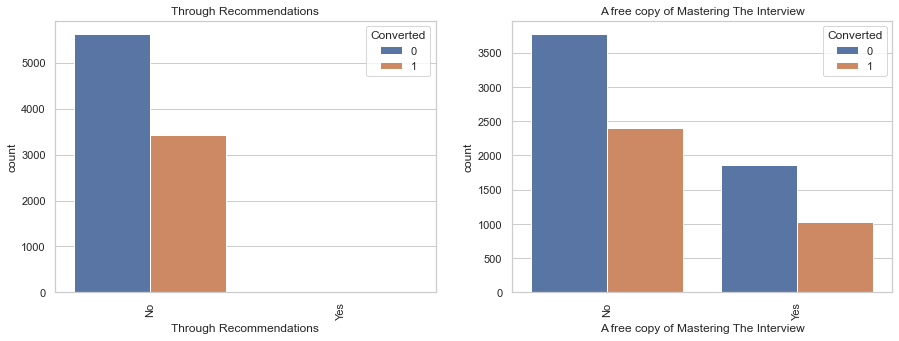

In [379]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

This plot does not gives much inference apart from a fact that "Through Recommendation" is also imbalanced.

In [380]:
# Now we check if there are columns with lowest frequency of Unique values.
 
leads_final.nunique()


Lead Origin                                         4
Lead Source                                         9
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                       8
Country                                             3
Specialization                                     11
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

*******************************************************************              

In [381]:
leads_final['Do Not Email'].value_counts(normalize=True)*100

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

In [382]:
leads_final['Converted'].value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

In [383]:
leads_final['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64

In [384]:
# Based on our visualisation above we will now delete the unwanted/ Unbalanced columns / columns with least unique values

Cols_to_del=['Country','What matters most to you in choosing a course','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
  'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [385]:
leads_final=leads_final.drop(Cols_to_del,1)

leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

-------------------------------------------------------------------------------------

2.1.2 Numerical Colums

In [386]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

<AxesSubplot:>

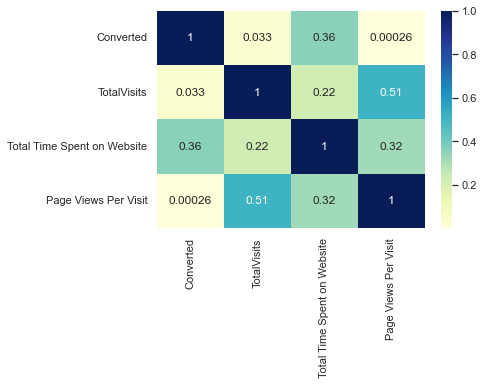

In [387]:
# By looking at the remaining columns and the given data set, we saw there are three numeric variables to consider apart from our target variable "Converted"

# I used Heat Map to get an insight on the correlation among the numeric variables.
def Lead_heatmap(x):
    return sns.heatmap(x.corr(), cmap='YlGnBu', annot=True) 

Lead_heatmap(leads_final)   

📌 By looking at the heatmap we say that "Total Visits" is the highly co-related variable.

CHECKING FOR OUTLIERS AND Outlier Treatment.

In [388]:
outlier = leads_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

outlier.describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000


📌 from the above it does not seems like we have any major/ possible outliers. We will look at each of the 3 variables individually next.m

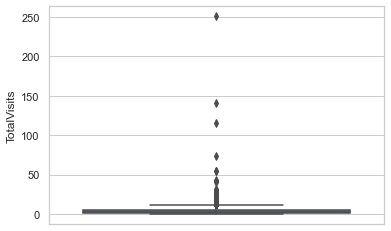

In [389]:
# For variable "Total Visits".

plt.figure(figsize=(6,4))

sns.boxplot(y=leads_final['TotalVisits'])
plt.show()

📌 It is evident that there are some outliers present in 'Total Visits'

In [390]:
leads_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

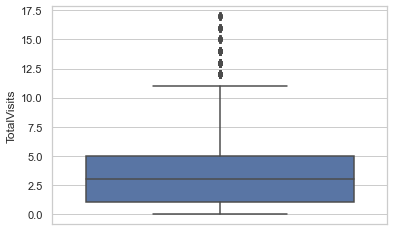

In [391]:
# Removing the Top 1% and bottom 1% values.

Q3 = leads_final.TotalVisits.quantile(0.99)
leads_final = leads_final[(leads_final.TotalVisits <= Q3)]

Q1 = leads_final.TotalVisits.quantile(0.01)
leads_final = leads_final[(leads_final.TotalVisits >= Q1)]

sns.boxplot(y=leads_final['TotalVisits'])
plt.show()

In [392]:
leads_final.shape

(8991, 14)

Now it can be said that there are not such possible outliers present in "TotalVisits"

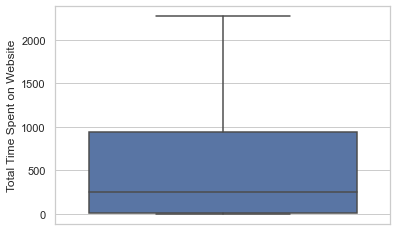

In [393]:
# Checking "Total Time Spent on Website"

sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()


As it is visible in above plot, there are no such possible outliers

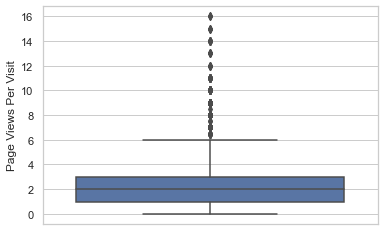

In [394]:
# Checking "Page Views Per Visit"

plt.figure(figsize=(6,4))

sns.boxplot(y=leads_final['Page Views Per Visit'])
plt.show()


In [395]:
leads_final['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

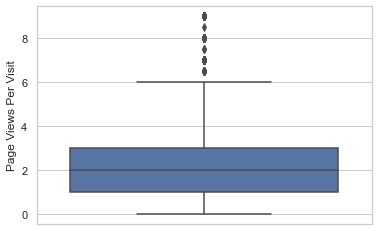

In [396]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads_final['Page Views Per Visit'].quantile(0.99)
leads_final = leads_final[leads_final['Page Views Per Visit'] <= Q3]

Q1 = leads_final['Page Views Per Visit'].quantile(0.01)
leads_final = leads_final[leads_final['Page Views Per Visit'] >= Q1]

sns.boxplot(y=leads_final['Page Views Per Visit'])
plt.show()

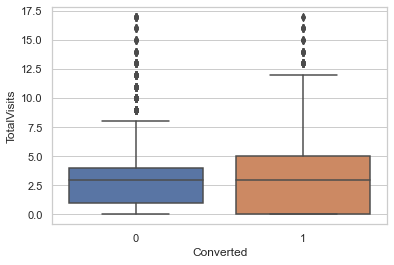

In [397]:
# Conparing "Total Visits" vs "Converted"

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_final)
plt.show()

1. Cannot say any concrete statement based on Total Visits.
2. Median is very close for converted and Non-Converted customers.

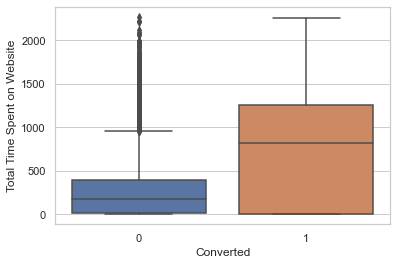

In [398]:
# Comparing "Total Time Spent on Website" vs "Converted" (target Variable)

sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads_final)
plt.show()

1. Customers who spend more time on website are more likely to convert.

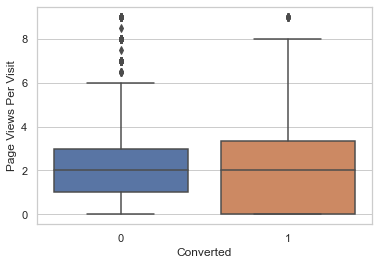

In [399]:
# "Page Views Per Visit" vs "Converted"

sns.boxplot(x='Converted',y='Page Views Per Visit', data=leads_final)
plt.show()


1. Nothing much can be infered based on this plot.
2. Median is exactly same for both types of conversions.

In [400]:
# Once again checking for percentage NULL values to rule out any mistakes.

perc_null(leads_final)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

<AxesSubplot:>

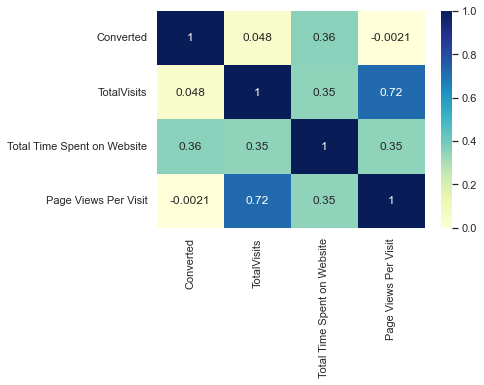

In [401]:
# Checking the Correaltion again.

Lead_heatmap(leads_final)

*****************************************************************************************

## 3. DUMMY VALUES CREATION AND SUBSTITUTION.

In [402]:
cat_cols= leads_final.select_dtypes(include=['object']).columns

cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [403]:
leads_final.loc[:, leads_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [404]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads_final[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_final_dummy = pd.concat([leads_final, dummy], axis=1)
leads_final_dummy

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Mentioned,Unemployed,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Mentioned,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Other_Activity,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Mentioned,Unemployed,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Other_Activity,Management,Unemployed,...,1,0,0,0,0,0,0,0,1,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,1
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,1,0,0,1
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Management,Unemployed,...,0,0,0,1,0,0,0,0,0,1


In [405]:
leads_final.shape

(8924, 14)

In [406]:
leads_final_dummy.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other_Activity,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,...,1,0,0,0,0,0,0,1,0,0


In [407]:
leads_final_dummy=leads_final_dummy.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                                           'Specialization', 'What is your current occupation', 'Tags', 'City',
                                        'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [408]:
leads_final_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


***************************************************************************************************
************************************************************************************************************************************************

### 4. Train Test Split

In [409]:
from sklearn.model_selection import train_test_split

In [410]:
# Adding the response variable to y 

y=leads_final_dummy['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [411]:
# Adding the predictive variables to x

X=leads_final_dummy.drop('Converted',axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [412]:
# Finally performing the Train Test Split.

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [413]:
X_train.shape

(6246, 50)

In [414]:
X_test.shape

(2678, 50)

In [415]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
6676,3.0,1247,3.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6138,4.0,816,4.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8650,3.0,1128,3.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3423,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6552,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


SCALING the DATA

In [416]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
6676,0.176471,0.548856,0.333333,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6138,0.235294,0.359155,0.444444,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8650,0.176471,0.496479,0.333333,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3423,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6552,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [417]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
count,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,...,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000
mean,0.184871,0.212004,0.250693,0.528498,0.063401,0.003522,0.322126,0.199328,0.121358,0.002081,...,0.222222,0.074127,0.047230,0.040826,0.080371,0.007365,0.309318,0.355908,0.089657,0.239033
std,0.169258,0.241374,0.209081,0.499227,0.243702,0.059249,0.467328,0.399527,0.326569,0.045578,...,0.415773,0.261999,0.212148,0.197903,0.271889,0.085508,0.462249,0.478826,0.285713,0.426527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.003081,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.106734,0.222222,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294118,0.404820,0.333333,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Logistic Model Building

In [418]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()

In [419]:
# Selecting the most important variable using RFE as we cannot determine on our own, since there are 50 columns.

from sklearn.feature_selection import RFE

In [420]:
# we will pick top 15 columns

rfe=RFE(logreg,15)

rfe= rfe.fit(X_train, y_train)

In [421]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True])

In [422]:
# Storing the selected features/variables in as a list.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 4),
 ('Last Activity_Page Visited on Website', False, 18),
 ('Last Activity_SMS Sent', False, 3),
 ('Specialization_Business Administration', False, 27),
 ('Specialization_E-

In [423]:
# Final list of columns selected by RFE.

RFE_cols= X_train.columns[rfe.support_]

RFE_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Tags_Not Specified', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [424]:
# Creating a dataframe of only the selected columns for VIF calculation.
X_train_rfe=X_train[RFE_cols]

In [425]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present

def VIF_CALC(df):
    vif=pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [426]:
VIF_CALC(X_train_rfe)

,Features,VIF
3,Lead Origin_Lead Add Form,49.72
4,Lead Source_Reference,39.16
5,Lead Source_Welingak Website,11.54
2,Page Views Per Visit,5.27
0,TotalVisits,4.68
13,Tags_Will revert after reading the email,2.51
1,Total Time Spent on Website,2.32
10,Tags_Not Specified,1.93
11,Tags_Other_Tags,1.68
14,Last Notable Activity_SMS Sent,1.55


In [427]:
# Just checking columns not selected.

X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Not Mentioned', 'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occu

*************************************************************************************************
*************************************************************************************************

MODEL-1

In [428]:
# Building Model-1

X_train_sm = sm.add_constant(X_train[RFE_cols])

model_1 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())

res = model_1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1674.6
Date:                Mon, 14 Nov 2022   Deviance:                       3349.1
Time:                        23:52:53   Pearson chi2:                 8.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5471
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.5185      0.396    -11.422      0.000      -5.294      -3.743
TotalVisits                                              1.8479      0.340      5.439      0.000       1.182       2.514
Total Time Spent on Website                              4.0224      0.199     20.194      0.000       3.632       4.413
Page Views Per Visit                                    -3.0302      0.327     -9.255      0.000      -3.672      -2.388
Lead Origin_Lead Add Form                                0.8527      1.108      0.770      0.441      -1.318       3.024
Lead Source_Reference                                    2.4879      1.142      2.179      0.029       0.250       4.726
Lead Source_Welingak Website                             4.3648      1.327      3.289      0.001       1.763       6.966
Do Not Email_Yes                                        -1.7824      0.221     -8.081      0.000      -2.215      -1.350
Last Activity_Olark Chat Conversation                   -1.2174      0.192     -6.342      0.000      -1.594      -0.841
What is your current occupation_Housewife               22.1504   1.55e+04      0.001      0.999   -3.03e+04    3.04e+04
What is your current occupation_Working Professional     1.4887      0.263      5.655      0.000       0.973       2.005
Tags_Not Specified                                       2.6174      0.392      6.676      0.000       1.849       3.386
Tags_Other_Tags                                          2.6119      0.392      6.657      0.000       1.843       3.381
Tags_Ringing                                            -1.0443      0.460     -2.272      0.023      -1.945      -0.144
Tags_Will revert after reading the email                 6.5901      0.421     15.656      0.000       5.765       7.415
Last Notable Activity_SMS Sent                           2.0600      0.113     18.153      0.000       1.838       2.282
========================================================================================================================
"""

As we can see some of the columns have high "P-Values" we will start dropping off the columns one by one.

In [429]:
# Looking at the vif to gain some more insight.

VIF_CALC(X_train_rfe)

,Features,VIF
3,Lead Origin_Lead Add Form,49.72
4,Lead Source_Reference,39.16
5,Lead Source_Welingak Website,11.54
2,Page Views Per Visit,5.27
0,TotalVisits,4.68
13,Tags_Will revert after reading the email,2.51
1,Total Time Spent on Website,2.32
10,Tags_Not Specified,1.93
11,Tags_Other_Tags,1.68
14,Last Notable Activity_SMS Sent,1.55


Here also we see that Some of the VIF's are extremely high. We'll look at VIF's again after dropping columns.

In [430]:
# Dropping 'Lead Origin_Lead Add Form' as it has both high VIF and p-value.

X_train_rfe_new=X_train_rfe.drop(['Lead Origin_Lead Add Form','Tags_Not Specified'], axis=1)

MODEL-2

In [431]:
# Building model 2

X_train_sm = sm.add_constant(X_train_rfe_new) # adding constant

model_2 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())

res = model_2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1717.3
Date:                Mon, 14 Nov 2022   Deviance:                       3434.6
Time:                        23:52:53   Pearson chi2:                 8.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5409
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0665      0.095    -21.714      0.000      -2.253      -1.880
TotalVisits                                              1.9655      0.334      5.884      0.000       1.311       2.620
Total Time Spent on Website                              3.9607      0.195     20.302      0.000       3.578       4.343
Page Views Per Visit                                    -3.1499      0.325     -9.705      0.000      -3.786      -2.514
Lead Source_Reference                                    3.2340      0.284     11.377      0.000       2.677       3.791
Lead Source_Welingak Website                             5.3075      0.736      7.210      0.000       3.865       6.750
Do Not Email_Yes                                        -1.7288      0.221     -7.823      0.000      -2.162      -1.296
Last Activity_Olark Chat Conversation                   -1.2511      0.190     -6.593      0.000      -1.623      -0.879
What is your current occupation_Housewife               22.1644   1.55e+04      0.001      0.999   -3.03e+04    3.04e+04
What is your current occupation_Working Professional     1.2792      0.246      5.194      0.000       0.797       1.762
Tags_Other_Tags                                          0.1861      0.098      1.901      0.057      -0.006       0.378
Tags_Ringing                                            -3.5099      0.259    -13.539      0.000      -4.018      -3.002
Tags_Will revert after reading the email                 4.1779      0.180     23.234      0.000       3.825       4.530
Last Notable Activity_SMS Sent                           2.1449      0.113     19.046      0.000       1.924       2.366
========================================================================================================================
"""

In [432]:
# Dropping 'What is your current occupation_Housewife' as it has high p-value.

X_train_rfe_new=X_train_rfe_new.drop(['What is your current occupation_Housewife'], axis=1)

In [433]:
# Looking at the VIF's

VIF_CALC(X_train_rfe_new)

,Features,VIF
2,Page Views Per Visit,5.01
0,TotalVisits,4.59
1,Total Time Spent on Website,2.23
10,Tags_Will revert after reading the email,2.06
11,Last Notable Activity_SMS Sent,1.49
8,Tags_Other_Tags,1.39
7,What is your current occupation_Working Profes...,1.29
9,Tags_Ringing,1.27
3,Lead Source_Reference,1.23
5,Do Not Email_Yes,1.07


We can see after dropping wo columns the VIF of the features have significantly come close to the expected values.

MODEL-3

In [434]:
# Building model 3

X_train_sm_3 = sm.add_constant(X_train_rfe_new) # adding constant

model_3 = sm.GLM(y_train,X_train_sm_3, family= sm.families.Binomial())

res = model_3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1720.4
Date:                Mon, 14 Nov 2022   Deviance:                       3440.9
Time:                        23:52:54   Pearson chi2:                 8.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5404
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0648      0.095    -21.711      0.000      -2.251      -1.878
TotalVisits                                              1.9514      0.334      5.844      0.000       1.297       2.606
Total Time Spent on Website                              3.9635      0.195     20.323      0.000       3.581       4.346
Page Views Per Visit                                    -3.1417      0.324     -9.688      0.000      -3.777      -2.506
Lead Source_Reference                                    3.2431      0.284     11.432      0.000       2.687       3.799
Lead Source_Welingak Website                             5.3052      0.736      7.207      0.000       3.862       6.748
Do Not Email_Yes                                        -1.7331      0.221     -7.843      0.000      -2.166      -1.300
Last Activity_Olark Chat Conversation                   -1.2549      0.190     -6.613      0.000      -1.627      -0.883
What is your current occupation_Working Professional     1.2714      0.246      5.162      0.000       0.789       1.754
Tags_Other_Tags                                          0.1950      0.098      1.995      0.046       0.003       0.387
Tags_Ringing                                            -3.5097      0.259    -13.537      0.000      -4.018      -3.002
Tags_Will revert after reading the email                 4.1817      0.180     23.263      0.000       3.829       4.534
Last Notable Activity_SMS Sent                           2.1407      0.113     19.015      0.000       1.920       2.361
========================================================================================================================
"""

In [435]:
# Dropping 'Tags_Ringing'

X_train_rfe_new=X_train_rfe_new.drop(['Tags_Ringing'], axis=1)

Model-4

In [436]:
# Building model 4

X_train_sm_4 = sm.add_constant(X_train_rfe_new) # adding constant

model_4 = sm.GLM(y_train,X_train_sm_4, family= sm.families.Binomial())

res = model_4.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1902.6
Date:                Mon, 14 Nov 2022   Deviance:                       3805.2
Time:                        23:52:54   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5128
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3556      0.094    -24.936      0.000      -2.541      -2.170
TotalVisits                                              1.8763      0.317      5.917      0.000       1.255       2.498
Total Time Spent on Website                              3.7865      0.181     20.882      0.000       3.431       4.142
Page Views Per Visit                                    -3.3847      0.310    -10.907      0.000      -3.993      -2.777
Lead Source_Reference                                    2.6386      0.256     10.323      0.000       2.138       3.140
Lead Source_Welingak Website                             5.5125      0.733      7.518      0.000       4.075       6.950
Do Not Email_Yes                                        -1.5408      0.214     -7.216      0.000      -1.959      -1.122
Last Activity_Olark Chat Conversation                   -1.0953      0.192     -5.700      0.000      -1.472      -0.719
What is your current occupation_Working Professional     1.2509      0.237      5.282      0.000       0.787       1.715
Tags_Other_Tags                                          0.7066      0.093      7.594      0.000       0.524       0.889
Tags_Will revert after reading the email                 4.6629      0.177     26.288      0.000       4.315       5.011
Last Notable Activity_SMS Sent                           1.6917      0.099     17.150      0.000       1.498       1.885
========================================================================================================================
"""

In [437]:
VIF_CALC(X_train_rfe_new)

,Features,VIF
2,Page Views Per Visit,4.81
0,TotalVisits,4.58
1,Total Time Spent on Website,2.23
9,Tags_Will revert after reading the email,1.93
10,Last Notable Activity_SMS Sent,1.45
8,Tags_Other_Tags,1.32
7,What is your current occupation_Working Profes...,1.29
3,Lead Source_Reference,1.22
5,Do Not Email_Yes,1.07
6,Last Activity_Olark Chat Conversation,1.03


Now finall in MODEL-4 we have low correlations among the variables as per the VIF and less P-Values for all the features. So, this is good model to move ahead with.

****************************************************
****************************************************

### 6. Making Predictions

Prediction on Train Data

In [438]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm_4)
y_train_pred[:10]

6676    0.973103
6138    0.986563
8650    0.990444
3423    0.030743
6552    0.086625
1696    0.066072
2110    0.995164
6830    0.706158
2581    0.321443
5927    0.163351
dtype: float64

In [439]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97310342, 0.98656314, 0.99044445, 0.03074286, 0.0866246 ,
       0.06607178, 0.99516365, 0.70615754, 0.32144327, 0.16335146])

In [440]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.973103,6676
1,1,0.986563,6138
2,1,0.990444,8650
3,0,0.030743,3423
4,0,0.086625,6552


In [441]:
# Substituting the probablities into a new column "Prediction" with 0 or 1 based on cut off as 0.6

y_train_pred_final['Prediction'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.6 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Prediction
0,1,0.973103,6676,1
1,1,0.986563,6138,1
2,1,0.990444,8650,1
3,0,0.030743,3423,0
4,0,0.086625,6552,0


## 7. Model Evaluation & Evaluation Metrics

In [442]:
# Importing metrics for evaluation
from sklearn import metrics

In [443]:
# Creating confusion matrix 
confusion_M = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction )
confusion_M

array([[3718,  153],
       [ 650, 1725]], dtype=int64)

In [444]:
print(round(100 * (metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Prediction))))

87


In [445]:
# Predicted     not_churn    churn
# Actual
# not_churn        3730       141
# churn             577      1798

In [446]:
TP = confusion_M[1,1] # true positive 
TN = confusion_M[0,0] # true negatives
FP = confusion_M[0,1] # false positives
FN = confusion_M[1,0] # false negatives

In [447]:
# Let's see the sensitivity of our logistic regression model
round(100 * (TP / float(TP+FN)))

73

In [448]:
# Let us calculate specificity
round(100 * (TN / float(TN+FP)))

96

In [449]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03952467062774477


___We see here that with the current cutoff 0.6 we get Accuracy of 88 %, sensitivity of 75 % and specificity of 96 %.

### 7. Finding Optimal Cut-Off.

In [450]:
# Using ROC Curve to find optimal cut-off 

# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [451]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                          y_train_pred_final.Converted_prob, drop_intermediate = False )

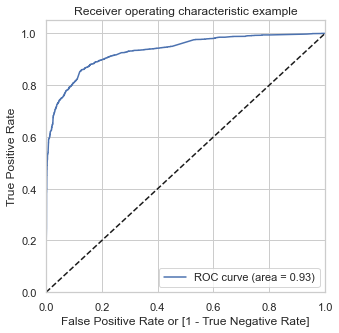

In [452]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

📌 As we can see from the curve we are getting a value of 0.93 which is a very good value, there by indicating that we have a good predictive model.

In [453]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.973103,6676,1,1,1,1,1,1,1,1,1,1,1
1,1,0.986563,6138,1,1,1,1,1,1,1,1,1,1,1
2,1,0.990444,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.030743,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.086625,6552,0,1,0,0,0,0,0,0,0,0,0


In [454]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probablity','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=(cm1[0,0]+cm1[0,1]+cm1[1,1]+cm1[1,0])
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probablity  accuracy     sensi     speci
0.0         0.0  0.380243  1.000000  0.000000
0.1         0.1  0.728626  0.943158  0.597003
0.2         0.2  0.831892  0.903158  0.788168
0.3         0.3  0.862472  0.866947  0.859726
0.4         0.4  0.867275  0.796211  0.910876
0.5         0.5  0.869356  0.758316  0.937484
0.6         0.6  0.871438  0.726316  0.960475
0.7         0.7  0.863913  0.687158  0.972359
0.8         0.8  0.846462  0.628211  0.980367
0.9         0.9  0.834294  0.578526  0.991217


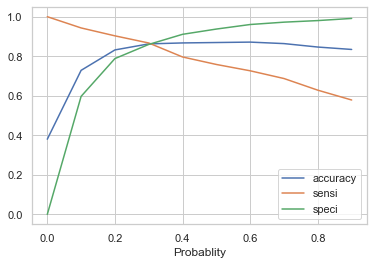

In [455]:

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probablity', y=['accuracy','sensi','speci'])
plt.show()

📌 We see that we get the optimal cutoff at approx 0.3

In [456]:
# Making Prediction based on cut-off from the ROC curve i.e 0.3

y_train_pred_final['Final_Prediction'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
0,1,0.973103,6676,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.986563,6138,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.990444,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.030743,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.086625,6552,0,1,0,0,0,0,0,0,0,0,0,0


In [457]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Prediction)

0.8624719820685238

In [458]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Prediction )
confusion2

array([[3328,  543],
       [ 316, 2059]], dtype=int64)

In [459]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [460]:
# Calculating the sensitivity

TP/(TP+FN)

0.8669473684210526

In [461]:
# Calculating the specificity

TN/(TN+FP)

0.8597261689485921

## Prediction on TEST SET

In [462]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
7625,0.117647,0.719485,0.222222,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5207,0.235294,0.393697,0.444444,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2390,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4362,0.117647,0.102974,0.222222,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1023,0.882353,0.140701,0.555556,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [463]:
# Substituting all the columns from the final train model

cols=X_train_rfe_new.columns

In [464]:
# Selecting same columns from X_train to use in X_test.

X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test[cols])
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Other_Tags,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
7625,1.0,0.117647,0.719485,0.222222,0,0,0,0,0,1,0,0
5207,1.0,0.235294,0.393697,0.444444,0,0,0,0,0,0,1,0
2390,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,1
4362,1.0,0.117647,0.102974,0.222222,0,0,0,0,0,0,0,1
1023,1.0,0.882353,0.140701,0.555556,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1.0,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0
566,1.0,0.176471,0.107412,0.333333,0,0,0,0,0,0,0,0
6433,1.0,0.058824,0.142477,0.111111,0,0,0,0,0,0,0,0
898,1.0,0.117647,0.072792,0.222222,0,0,0,0,0,0,0,0


In [465]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to concatenate them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Concating y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Problity'})

y_pred_final.head()

,Converted,Conversion_Problity
0,0,0.632721
1,1,0.939077
2,1,0.981998
3,0,0.308887
4,0,0.114293


In [466]:
# Making prediction using optimal cut off 0.3
y_pred_final['Final_Prediction'] = y_pred_final.Conversion_Problity.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Converted,Conversion_Problity,Final_Prediction
0,0,0.632721,1
1,1,0.939077,1
2,1,0.981998,1
3,0,0.308887,1
4,0,0.114293,0
...,...,...,...
2673,0,0.030743,0
2674,0,0.060315,0
2675,0,0.110880,0
2676,0,0.068411,0


In [467]:
# Assigning a Score to determine the Hottest Lead.
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Problity.map( lambda x: round(x*100))

In [468]:
y_pred_final.head()

,Converted,Conversion_Problity,Final_Prediction,Lead_Score
0,0,0.632721,1,63
1,1,0.939077,1,94
2,1,0.981998,1,98
3,0,0.308887,1,31
4,0,0.114293,0,11


In [469]:
# Let's check the overall accuracy.
round(100 * (metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Prediction)))

86

In [470]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Prediction )
confusion3

array([[1435,  249],
       [ 133,  861]], dtype=int64)

In [471]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [472]:
# Let's see the sensitivity of our logistic regression model
round(100 * (TP / float(TP+FN)))

87

In [473]:
# Let us calculate specificity
round(100 * (TN / float(TN+FP)))

86

In [474]:
from sklearn.metrics import precision_score, recall_score

In [475]:
round(100 * (precision_score(y_pred_final.Converted , y_pred_final.Final_Prediction)))

78

In [476]:
round(100 * (recall_score(y_pred_final.Converted, y_pred_final.Final_Prediction)))

87

********************************************
********************************************

### Feature Importance.

In [477]:
res.params

const                                                  -2.355563
TotalVisits                                             1.876310
Total Time Spent on Website                             3.786479
Page Views Per Visit                                   -3.384705
Lead Source_Reference                                   2.638596
Lead Source_Welingak Website                            5.512494
Do Not Email_Yes                                       -1.540808
Last Activity_Olark Chat Conversation                  -1.095309
What is your current occupation_Working Professional    1.250863
Tags_Other_Tags                                         0.706568
Tags_Will revert after reading the email                4.662946
Last Notable Activity_SMS Sent                          1.691739
dtype: float64

In [478]:
# get relative feature importance by using min-max scaling
feature_importance = res.params[1:]
feature_importance = (feature_importance - feature_importance.min() / (feature_importance.max() - feature_importance.min()))
feature_importance

TotalVisits                                             2.256733
Total Time Spent on Website                             4.166903
Page Views Per Visit                                   -3.004281
Lead Source_Reference                                   3.019020
Lead Source_Welingak Website                            5.892917
Do Not Email_Yes                                       -1.160385
Last Activity_Olark Chat Conversation                  -0.714885
What is your current occupation_Working Professional    1.631287
Tags_Other_Tags                                         1.086992
Tags_Will revert after reading the email                5.043369
Last Notable Activity_SMS Sent                          2.072163
dtype: float64

In [479]:
sorted_feats = np.argsort(feature_importance, kind='quicksort', order='list of str')
sorted_feats

TotalVisits                                              2
Total Time Spent on Website                              5
Page Views Per Visit                                     6
Lead Source_Reference                                    8
Lead Source_Welingak Website                             7
Do Not Email_Yes                                        10
Last Activity_Olark Chat Conversation                    0
What is your current occupation_Working Professional     3
Tags_Other_Tags                                          1
Tags_Will revert after reading the email                 9
Last Notable Activity_SMS Sent                           4
dtype: int64

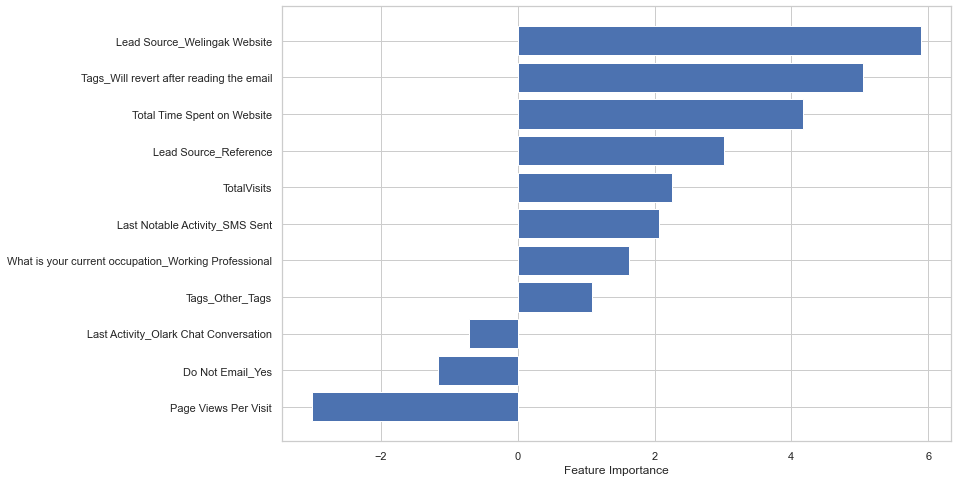

In [480]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_feats.shape[0])
plt.barh(pos, feature_importance[sorted_feats])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(cols)[sorted_feats])
ax.set_xlabel('Feature Importance') 
plt.show()

The 3 most important features of our model are as follows:
1. Tags_Will revert after reading the email
2. Lead Source_Welingak Website
3. Total Time Spent on Website

Final Observations :

1. For Train data set:
    Accuracy= 86 %
    Sensitivity = 86 %
    Specificity = 86 %

2. For Test data set :
    Accuracy= 86 %
    Sensitivity = 87 %
    Specificity = 86 %

Also our model has Precision_score of 78 % and Recall Score of 87 %.

So overall we can say that our model can very well predict the conversion of any Leads and the company can move ahead with our model.